# Applied Spatial Data Analysis with R  
**Springer**
**UseR!**  
## 2: Classes for Spatial Data in R  
**Roger S. Bivand**  
**Edzer Pebesma**  
**Virgilio Gómez-Rubio**

Transcribed by **Joshua Poirier**  
**February 2017**

### 2.2 Classes and Methods in R  

Let's look at the *cars* data set which contains two variables, one recording the speed of the observed cars in mph, the other the stopping distance measured in feet. These observations were made in the 1920's.

     speed           dist            qspeed  
 Min.   : 4.0   Min.   :  2.00   [4,12] :15  
 1st Qu.:12.0   1st Qu.: 26.00   (12,15]:11  
 Median :15.0   Median : 36.00   (15,19]:12  
 Mean   :15.4   Mean   : 42.98   (19,25]:12  
 3rd Qu.:19.0   3rd Qu.: 56.00               
 Max.   :25.0   Max.   :120.00               

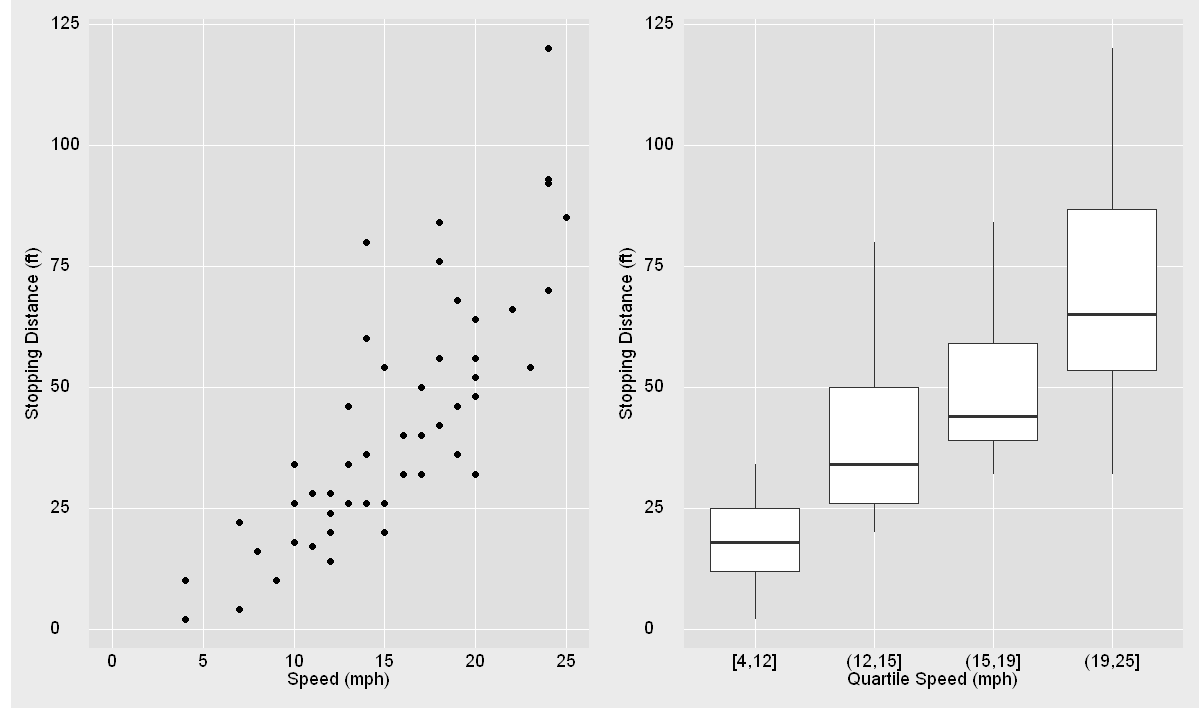

In [9]:
options(repr.plot.width=10, repr.plot.height=6)

library(ggplot2)
library(ggthemes)
library(cowplot)

summary(cars)
cars$qspeed <- cut(cars$speed, breaks=quantile(cars$speed), include.lowest=T)

g1 <- ggplot(data=cars, aes(x=speed, y=dist)) + theme_economist_white() +
    geom_point() +
    labs(x="Speed (mph)", y="Stopping Distance (ft)") +
    xlim(0,25) +
    theme(
        panel.grid.major.x = element_line(color="white", size=.5),
        panel.grid.major.y = element_line(color="white", size=.5),
        panel.background   = element_rect(fill="gray88"),
        axis.line          = element_blank(),
        axis.ticks         = element_blank(),
        legend.position    = "right"
    )

g2 <- ggplot(data=cars, aes(x=qspeed, y=dist)) + theme_economist_white() +
    geom_boxplot() +
    labs(x="Quartile Speed (mph)", y="Stopping Distance (ft)") +
    theme(
        panel.grid.major.x = element_line(color="white", size=.5),
        panel.grid.major.y = element_line(color="white", size=.5),
        panel.background   = element_rect(fill="gray88"),
        axis.line          = element_blank(),
        axis.ticks         = element_blank(),
        legend.position    = "right"
    )

g <- plot_grid(g1, g2, ncol=2)
ggdraw() + draw_plot(g, width=1, height=1)

In [12]:
lm(formula=dist~speed, data=cars)
"---------------------------------------"
lm(formula=dist~qspeed, data=cars)


Call:
lm(formula = dist ~ speed, data = cars)

Coefficients:
(Intercept)        speed  
    -17.579        3.932  


[1] "---------------------------------------"


Call:
lm(formula = dist ~ qspeed, data = cars)

Coefficients:
  (Intercept)  qspeed(12,15]  qspeed(15,19]  qspeed(19,25]  
        18.20          21.98          31.97          51.13  


### 2.3 Spatial Objects

In [14]:
suppressMessages(library(sp))

m <- matrix(c(0, 0, 1, 1), ncol=2, dimnames=list(NULL, c("min", "max")))
crs <- CRS(projargs = as.character(NA))

S <- Spatial(bbox = m, proj4string = crs)
S

An object of class "Spatial"
Slot "bbox":
     min max
[1,]   0   1
[2,]   0   1

Slot "proj4string":
CRS arguments: NA 


### 2.4 Spatial Points

In [20]:
CRAN_df <- read.table("CRAN051001a.txt", header=T)
CRAN_mat <- cbind(CRAN_df$long, CRAN_df$lat)
row.names(CRAN_mat) <- 1:nrow(CRAN_mat)

llCRS <- CRS("+proj=longlat +ellps=WGS84")
CRAN_sp <- SpatialPoints(CRAN_mat, proj4string=llCRS)
summary(CRAN_sp)

Object of class SpatialPoints
Coordinates:
                 min      max
coords.x1 -122.95000 153.0333
coords.x2  -37.81667  57.0500
Is projected: FALSE 
proj4string : [+proj=longlat +ellps=WGS84]
Number of points: 54

In [22]:
bbox(CRAN_sp)
proj4string(CRAN_sp)

,min,max
coords.x1,-122.95000,153.0333
coords.x2,-37.81667,57.0500


[1] "+proj=longlat +ellps=WGS84"

If we want to extract the CRAN mirrors located in Brazil in 2005:

In [25]:
brazil <- which(CRAN_df$loc == "Brazil")
coordinates(CRAN_sp)[brazil,]

,coords.x1,coords.x2
4,-49.26667,-25.41667
5,-42.86667,-20.75000
6,-43.20000,-22.90000
7,-47.63333,-22.71667
8,-46.63333,-23.53333


In [27]:
summary(CRAN_sp[brazil,])

Object of class SpatialPoints
Coordinates:
                min       max
coords.x1 -49.26667 -42.86667
coords.x2 -25.41667 -20.75000
Is projected: FALSE 
proj4string : [+proj=longlat +ellps=WGS84]
Number of points: 5

In [29]:
CRAN_spdf1 <- SpatialPointsDataFrame(CRAN_mat, CRAN_df, proj4string=llCRS, match.ID=T)
CRAN_spdf1[4,]
"---------------------------------"
str(CRAN_spdf1$loc)

             coordinates    place   north    east    loc      long       lat
4 (-49.26667, -25.41667) Curitiba 25d25'S 49d16'W Brazil -49.26667 -25.41667

[1] "---------------------------------"

 Factor w/ 30 levels "Australia","Austria",..: 1 1 2 3 3 3 3 3 4 19 ...


In [30]:
s <- sample(nrow(CRAN_df))
CRAN_spdf2 <- SpatialPointsDataFrame(CRAN_mat, CRAN_df[s,], proj4string=llCRS, match.ID=T)
all.equal(CRAN_spdf2, CRAN_spdf1)

[1] TRUE